# Partie 1 : méthodes de gradient

Le but de cette première partie du TP est de programmer, valider et expérimenter l’algorithme du **gradient à pas fixe (GF)** et à **gradient à pas optimal (GO)**. Pour faciliter les comparaisons, les 2 variantes seront implémentées dans le même programme. Pour les expérimentations et validations, on considèrera les fonctions suivantes:

$$
J_{1}(v)=\sum_{i=1}^{i=N}\left(v_{i}-1\right)^{2}, \quad J_{2}(v)=\sum_{i=1}^{i=N}\left(v_{i}-i\right)^{2}, \quad J_{R}(v)=\sum_{i=1}^{i=N-1}\left\{\left(v_{i+1}-v_{i}^{2}\right)^{2}+\left(v_{i}-1\right)^{2}\right\}
$$

> Préciser les gradients, et les solutions optimales exactes pour ces 3 fonctions coût.

# Les gradients
$\bullet J_1$ 
$$ \nabla J_1 = 
2\begin{pmatrix}
v_1 -1 \\
v_2 -1 \\
. \\
. \\
. \\
v-N -1
\end{pmatrix}
$$


$\bullet J_2$ 
$$ \nabla J_2 = 
2\begin{pmatrix}
v_1 -1 \\
v_2 -2 \\
. \\
. \\
. \\
v_N -N
\end{pmatrix}
$$


$\bullet J_3$ 
$$ \nabla J_3 = 
\begin{pmatrix}
-4v_1(v_2-v_1^2) + 2(v_1 -1) \\
-4v_2(v_3-v_2^2) + 2(2v_2-v_1-1) \\
. \\
. \\
. \\
-4v_i(v_{i+1}-v_i^2) + 2(2v_i-v_{i-1}-1) \\
. \\
. \\
-4v_{N-1}(v_{N}-v_{N-1}^2) + 2(2v_{N-1}-v_{N-2}-1) \\
2(v_N - v_{N-1}
\end{pmatrix}
$$


# Les solutions optimales exactes

$\bullet J_1$ 
$$ V = 
\begin{pmatrix}
1 \\
1 \\
. \\
. \\
. \\
1
\end{pmatrix}
$$

$\bullet J_2$ 
$$ V = 
\begin{pmatrix}
1 \\
2 \\
. \\
. \\
. \\
N
\end{pmatrix}
$$

$\bullet J_3$ 
$$ V = 
\begin{pmatrix}
1 \\
1 \\
. \\
. \\
. \\
1
\end{pmatrix}
$$


$$
\nabla J_1 (v),\quad\quad \nabla J_2 (v),\quad\quad \nabla J_R (v) ~~ ?
$$

In [99]:
import numpy as np

In [108]:
def J1 (v): # retourne la valeur de la fonction et de sont gradient
    N = len(v)
    ones = np.ones (N)
    return [np.dot(v-ones,v-ones), 2*(v-ones)]

def J2 (v):
    N = len(v)
    I = np.arange(1,N+1,1)
    return [np.dot(v-I, v-I),2*(v-I)]


## JR Rosenbrock
def JR (v):
    N = len (v)
    J_r = 0
    for i in range(N-1):
        J_r += (v[i+1]-v[i]**2)**2 + (v[i]-1)**2

    Grad_J = [-4*v[0]*(v[1]-v[0]**2) + 2*(v[0]-1)]
    for j in range(1,N-1):
        Grad_J.append(-4*v[j]*(v[j+1]-v[j]**2) + 2*(2*v[j]-v[j-1]-1))
   
    Grad_J.append(2*(v[N-1]-v[N-2]**2))
  
    return [J_r, Grad_J]

Evaluations des fonctions et de leurs gradients :

In [101]:
v = np.array([1,2,1]) ## prendre des exemples test
J1(v)

[J0,G0] = J1(v)

print ('La valeur de J_1 en v={} est égale à {}'.format(v,J0))
print ('Le gradient de J_1 en v={} est égale à {}'.format(v,G0))

La valeur de J_1 en v=[1 2 1] est égale à 1.0
Le gradient de J_1 en v=[1 2 1] est égale à [0. 2. 0.]


In [102]:
v = np.zeros(3)
[J1,G1] = J2(v)

print ('La valeur de J_1 en v={} est égale à {}'.format(v,J1))
print (r'Le gradient de J_1 en v={} est égale à {}'.format(v,G1))

La valeur de J_1 en v=[0. 0. 0.] est égale à 14.0
Le gradient de J_1 en v=[0. 0. 0.] est égale à [-2. -4. -6.]


In [103]:
v = np.zeros(3)
[J2,G2] = JR(v)

print ('La valeur de J_1 en v={} est égale à {}'.format(v,J2))
print (r'Le gradient de J_1 en v={} est égale à {}'.format(v,G2))

La valeur de J_1 en v=[0. 0. 0.] est égale à 2.0
Le gradient de J_1 en v=[0. 0. 0.] est égale à [-2.0, -2.0, 0.0]


Traçage des fonctions par rapport à la dernière variable :

In [104]:
%matplotlib inline
import matplotlib.pyplot as plt

C:\Users\HP\AppData\Local\Temp\ipykernel_14308\2439198977.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


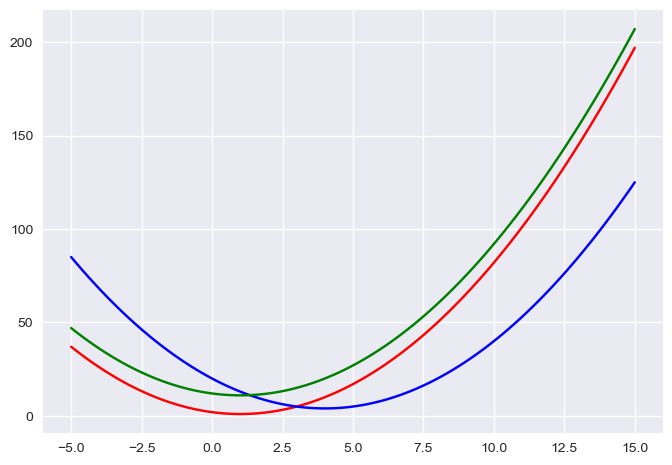

In [109]:
## Ici on trace J(1,2,1,x) avec x entre -5 et 15 juste pour voir ces variations par rapport à une variable (la dernière)
plt.style.use('seaborn')

x = np.linspace(-5,15,100)
v =np.array([1,2,1])

y1 = [J1(np.append (v,xi))[0] for xi in x]
y2 = [J2(np.append (v,xi))[0] for xi in x]
yR = [JR(np.append (v,xi))[0] for xi in x]

plt.plot(x,y1,color="red")
plt.plot(x,y2,color="blue")
plt.plot(x,yR,color="green")

## Etape 1.
> Rappeler les trois versions GF, GV et GO, et identifier l’ensemble des données utilisateur, numériques, et de contrôle.

$\bullet Méthode de gradient dans le cas générale$
>  
- Initiaisation: $u_0 \in {\mathbb R}^n$ arbitraire et pas $t>0$
- Itérations: répéter pour $k=0,1,\dots$   
  - calculer le gradient $\nabla f (u_{k})$;
  - calculer $u_{k+1} = u_{k} - t_k\nabla f (u_{k})$;
- Critère d'arrêt:  $\|\nabla f (u_{k}) \|_2 \leq \epsilon$ 

- Le cas $GF$ est celui pour lequel le pas $t_k$ est fixe.
- Le cas $GO$ est celui pour lequel le pas $t_k$ vérifie $t_{k}:=\mathop{\mathrm{argmin}}\limits_{t>0}\tilde{f}(t)$ avec 

## Etape 2.
- Ecrire le programme GF (utiliser les modules déjà définis de calcul de la fonction coût et de son gradient pour les fonctions $J_1$, $J_2$, $J_R$).
- Effectuer les tests de validation de GF pour les fonctions $J_1$ et $J_2$ ($N = 10,20,40$) : On prendra un pas fixe $t = 1$, qu’observe t-on et pourquoi ? puis prendre $t=0.1$ et ensuite $t = 0.5$.

**Pseudocode**

>  
- Initiaisation: $u_0 \in {\mathbb R}^n$ arbitraire et pas $t>0$
- Itérations: répéter pour $k=0,1,\dots$   
  - calculer le gradient $\nabla f (u_{k})$;
  - calculer $u_{k+1} = u_{k} - t \nabla f (u_{k})$;
- Critère d'arrêt:  $\|\nabla f (u_{k}) \|_2 \leq \epsilon$ $\big($on utilise ici la norme euclidienne $\|\cdot \|_2$ $\big)$


In [110]:
# Modifier ici le choix de fonction, J1, J2, JR
def cost(v):
    return J1(v)

In [143]:
N=40 ; #nombre de variables d'optimisation (ou dimension du probleme)
eps = 1.e-7; # tolerance sur la norme du gradient
Kmax = 1500 ; # nombre max d'iterations
# Pour le gradient à pas fixe : le pas est

t = 0.1;
#t = 0.5;


# First guess : u0
u0 = np.zeros(N)
# Itérations de l'agorithme GF à completer...
# vous pouvez utiliser la fonction np.linalg.norm pour évaluer la norme 2 d'un vecteur

X_1 = []
Y_1 = []
U_k = u0
val = 1
l = 0

while np.linalg.norm(val) > eps and l < Kmax:
    X_1.append(l)
    Y_1.append(cost(U_k)[0])
    U_k1 = U_k - t*cost(U_k)[1]
    val = cost(U_k1)[1]
    U_k = U_k1
    l+=1

## Afficher le nombre d'itération et le vecteur trouvé...
print(f"Le nomdre d'itération est {l} et la valeur trouvé est {U_k}")

Le nomdre d'itération est 84 et la valeur trouvé est [0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999]


## Etape 3.
> Dans cette étape on va construire l’approximation parabolique de la fonction $f(t) = J(u_k − t\nabla J(u_k))$, qui utilise $f(0)$, $f′(0)$ et $f(t_{k−1})$. S’en servir pour implémenter une approximation du calcul du pas optimal $t_k$. Valider GO sur les cas $J_1$ et $J_2$. Comparer ensuite GF et GO sur $J_R$ (tracer, sur le même graphique, les 2 courbes de convergence des coûts en fonction des itérations).

Etant donné $u_k$, la valeur $J(u_k)$ et le gradient $\nabla J(u_k)$, on propose d'approcher $J$ par un modèle quadratique au voisinage de $u_k$ le long du gradient $G_k:= \nabla J (u_k)$, soit

$$
f(t):= J(u_k- t G_k ) \simeq J(u_k) - t G_k^\top G_k + \gamma_k t^2 =: \tilde{f}(t),
$$
avec $\gamma_k$  un scalaire qu'il faut identifier . On a en particulier,

$$
f(0)=J(u_k),
\quad\quad f'(0)= - G_k^\top G_k.
$$

- En prenant $\tilde{f}(t_{k-1}) = f(t_{k-1})$, **identifier** l'expression de $\gamma_k$ en fonction de $t_{k-1}, f(t_{k-1}), J(u_k)$ et $\nabla J (u_k)$. 
-
$\begin{align*}
    \tilde{f}(t_{k-1}) = f(t_{k-1}) &\iff J(u_k- t_{k-1} G_k ) = J(u_k) - t_{k-1} G_k^\top G_k + \gamma_k t_{k-1}^2 \\
    & \iff \gamma_k = \dfrac{J(u_k- t_{k-1} G_k )-J(u_k)- t_{k-1} G_k^\top G_k}{t_{k-1}^2} \\
    & \iff \boxed{\gamma_k = \dfrac{J(u_k- t_{k-1} G_k )-J(u_k)- t_{k-1} \|\nabla J (u_{k}) \|^{2}_2}{t_{k-1}^2}}
\end{align*}$
  


- **En déduire** l'approximation $t_{k}:=\mathop{\mathrm{argmin}}\limits_{t>0}\tilde{f}(t)$ du pas optimal en fonction de $\gamma_k$ et $\nabla J(u_k)$.
- En dérivant $\tilde{f}(t)$ on obtient:  $\tilde{f}(t)^{'} = -G_k^\top G_k + 2\gamma_k t$. Ainsi $ \tilde{f}(t_k)^{'} = 0\iff \boxed{t_k = \dfrac{G_k^\top G_k}{2\gamma_k} = \dfrac{\|\nabla J (u_{k}) \|^{2}_2}{2\gamma_k}}$
- **Implémenter** l'expression du pas optimal approché pour $J_1$, $J_2$ et $J_R$ dans la fonction suivante (où $u$ joue le rôle de $u_{k}$ et $t$ joue le rôle de $t_{k-1}$):


In [112]:
def PasOptJ1(u,t):
    gam_k = (J1(u-t*J1(u)[1])[0]-J1(u)[0]+t*np.dot(J1(u)[1],J1(u)[1]))/(t**2)
    Nab_u = np.dot(J1(u)[1],J1(u)[1])
    tk = Nab_u/(2*gam_k)
    return tk

def PasOptJ2(u,t):
    gam_k = (J2(u-t*J2(u)[1])[0]-J2(u)[0]+t*np.dot(J2(u)[1],J2(u)[1]))/(t**2)
    Nab_u = np.dot(J2(u)[1],J2(u)[1])
    tk = Nab_u/(2*gam_k)
    return tk

def PasOptJR(u,t):
    gam_k = (JR(u-t*JR(u)[1])[0]-JR(u)[0]+t*np.dot(JR(u)[1],JR(u)[1]))/(t**2)
    Nab_u = np.dot(JR(u)[1],JR(u)[1])
    tk = Nab_u/(2*gam_k)
    return tk


In [113]:
PasOptJR(np.zeros(2),1)

0.1

**Pseudocode du GO (approché)**

>  
- Initialisation: prende un vecteur $u_0 \in {\mathbb R}^n$ arbitraire et un scalaire arbitraire $t_{-1}>0$
- Itérations: Répéter pour $k=0, 1,\dots$
  - Calculer le pas optimal approché $t_k$;
  - Calculer $u_{k+1} = u_{k} - t_{k} \nabla J (u_{k})$;
- Critère d'arrêt:  $\|\nabla J (u_{k}) \|_2 \leq \epsilon$


Valider cet algorithme GO sur les cas $J_1$ et $J_2$.

In [142]:
N=10 ; #nombre de variables d'optimisation (ou dimension du probleme)
eps = 1.e-7; # tolerance sur la norme du gradient
Kmax = 1500 ; # nombre max d'iterations
# Pour le gradient à pas fixe : le pas est

#t = 0.1;
t = 0.5;


# First guess : u0
u0 = np.zeros(N)
# Itérations de l'agorithme GF à completer...
# vous pouvez utiliser la fonction np.linalg.norm pour évaluer la norme 2 d'un vecteur

X_1 = []
Y_1 = []
U_k = u0
val1 = 1
l = 0

def costJ1(v):
    return J1(v)

while np.linalg.norm(val1) > eps and l < Kmax:
    X_2.append(l)
    Y_2.append(costJ1(U_k)[0])
    t = PasOptJ1(U_k,t)
    U_k1 = U_k - t*costJ1(U_k)[1]
    val1 = costJ1(U_k1)[1]
    U_k = U_k1
    l+=1

## Afficher le nombre d'itération et le vecteur trouvé...
print(f"Le nomdre d'itération est {l} et la valeur trouvé est {U_k}")

Le nomdre d'itération est 1 et la valeur trouvé est [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [140]:
# First guess : u0
u0 = np.zeros(N)
# Itérations de l'agorithme GF à completer...
# vous pouvez utiliser la fonction np.linalg.norm pour évaluer la norme 2 d'un vecteur
X_2 = []
Y_2 = []
U_k = u0
val2 = 1
l = 0

def costJ2(v):
    return J2(v)

while np.linalg.norm(val2) > eps and l < Kmax:
    X_2.append(l)
    Y_2.append(costJ2(U_k)[0])
    t = PasOptJ2(U_k,t)
    U_k1 = U_k - t*costJ2(U_k)[1]
    val2 = costJ2(U_k1)[1]
    U_k = U_k1
    l+=1

## Afficher le nombre d'itération et le vecteur trouvé...
print(f"Le nomdre d'itération est {l} et la valeur trouvé est {U_k}")

Le nomdre d'itération est 1 et la valeur trouvé est [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


Comparer ensuite GF et GO sur  $J_R$  (tracer, sur le même graphique, les 2 courbes de convergence des coûts en fonction des itérations)

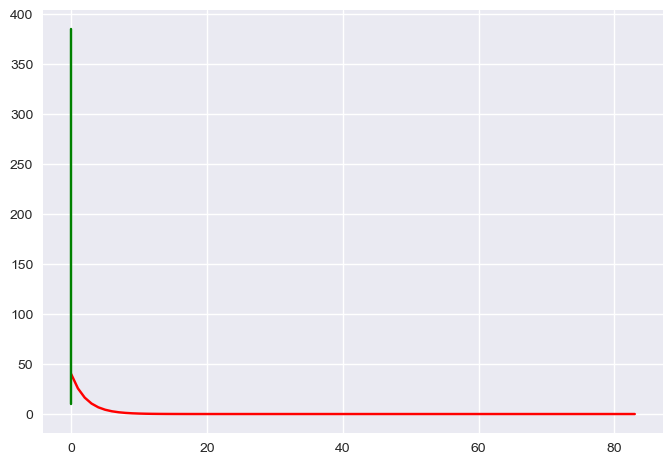

In [144]:
import matplotlib.pyplot as plt
plt.plot(X_1,Y_1,'r')
plt.plot(X_2,Y_2,'g')
plt.show()

## Etape 5.
> Etudier les méthodes GF et GO sur le cas de la fonction $J_H (x, y) = (x^2 +y−2)^2 +(y^2 −2x+1)^2$ . On prendra comme guess initial $u_0 = (0, 0)$ puis $u_0 = (1.5, −1.5)$. Que constatez-vous ? Comment valider ce constat ?

In [116]:
def J_H(X):
    J = (X[0]**2+X[1]-2)**2 + (X[1]**2 -2*X[0]+1)**2
    J_x = 4*X[0]*(X[0]**2+X[1]-2) - 4*(X[1]**2 -2*X[0]+1)
    J_y = 2*(X[0]**2+X[1]-2) + 2*X[1]*(X[1]**2 -2*X[0]+1)
    return (J, np.array([J_x,J_y]))

def costJ(v):
    return J_H(v)


In [145]:
N=40 ; #nombre de variables d'optimisation (ou dimension du probleme)
eps = 1.e-7; # tolerance sur la norme du gradient
Kmax = 1500 ; # nombre max d'iterations
# Pour le gradient à pas fixe : le pas est

t = 0.1;
#t = 0.5;

# Pas fixe

# First guess : u0 = [0,0]
u0 = np.zeros(2)

X = []
Y = []
U_k = u0
val = 1
l = 0

while np.linalg.norm(val) > eps and l < Kmax:
    X.append(l)
    Y.append(costJ(U_k)[0])
    U_k1 = U_k - t*costJ(U_k)[1]
    val = costJ(U_k1)[1]
    U_k = U_k1
    l+=1

## Afficher le nombre d'itération et le vecteur trouvé...
print(f"Le nomdre d'itération est {l} et la valeur trouvé est {U_k}")

Le nomdre d'itération est 31 et la valeur trouvé est [1. 1.]


In [146]:
# Pas optimal
# First guess : u0 = [0,0]
u0 = np.zeros(2)

U = []
V = []
U_k = u0
val = 1
l = 0

while np.linalg.norm(val) > eps and l < Kmax:
    X.append(l)
    Y.append(costJ(U_k)[0])
    t = PasOptJ2(U_k,t)
    U_k1 = U_k - t*costJ(U_k)[1]
    val = costJ(U_k1)[1]
    U_k = U_k1
    l+=1

## Afficher le nombre d'itération et le vecteur trouvé...
print(f"Le nomdre d'itération est {l} et la valeur trouvé est {U_k}")

Le nomdre d'itération est 7 et la valeur trouvé est [ 8.02201713e+297 -2.07829067e+198]


C:\Users\HP\AppData\Local\Temp\ipykernel_14308\1260202448.py:2: RuntimeWarning: overflow encountered in scalar power
  J = (X[0]**2+X[1]-2)**2 + (X[1]**2 -2*X[0]+1)**2
C:\Users\HP\AppData\Local\Temp\ipykernel_14308\1260202448.py:3: RuntimeWarning: overflow encountered in scalar power
  J_x = 4*X[0]*(X[0]**2+X[1]-2) - 4*(X[1]**2 -2*X[0]+1)
C:\Users\HP\AppData\Local\Temp\ipykernel_14308\1260202448.py:3: RuntimeWarning: invalid value encountered in scalar subtract
  J_x = 4*X[0]*(X[0]**2+X[1]-2) - 4*(X[1]**2 -2*X[0]+1)
C:\Users\HP\AppData\Local\Temp\ipykernel_14308\1260202448.py:4: RuntimeWarning: overflow encountered in scalar power
  J_y = 2*(X[0]**2+X[1]-2) + 2*X[1]*(X[1]**2 -2*X[0]+1)
C:\Users\HP\AppData\Local\Temp\ipykernel_14308\1260202448.py:4: RuntimeWarning: invalid value encountered in scalar add
  J_y = 2*(X[0]**2+X[1]-2) + 2*X[1]*(X[1]**2 -2*X[0]+1)


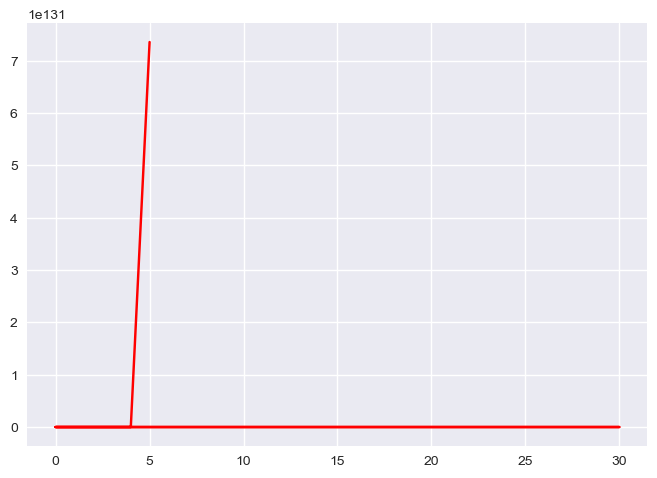

In [147]:
import matplotlib.pyplot as plt
plt.plot(X,Y,'r')
plt.plot(U,V,'b')
plt.show()